In [19]:
from sklearn import datasets
iris=datasets.load_iris()

In [20]:
x=iris.data
y=iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [21]:
features=iris.feature_names

In [24]:
x.shape, y.shape

((150, 4), (150,))

In [43]:
X=pd.DataFrame(x,columns=features)

In [39]:
features

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [44]:
X.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [47]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [59]:
X["sepal length (cm)"]

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal length (cm), Length: 150, dtype: float64

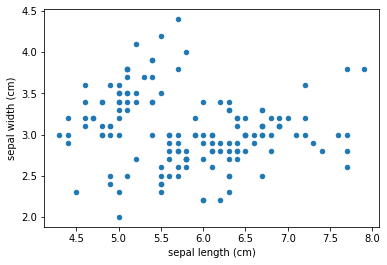

In [61]:
import matplotlib.pyplot as plt
X.plot(kind="scatter",x="sepal length (cm)",y="sepal width (cm)")

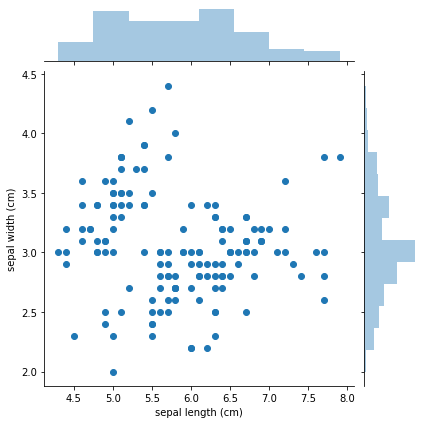

In [65]:
import seaborn as sns
sns.jointplot(x="sepal length (cm)",y="sepal width (cm)",data=X,ratio=5)

In [69]:
X=np.column_stack((x,y))
X=pd.DataFrame(X,columns=features+["category"])

In [71]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),category
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


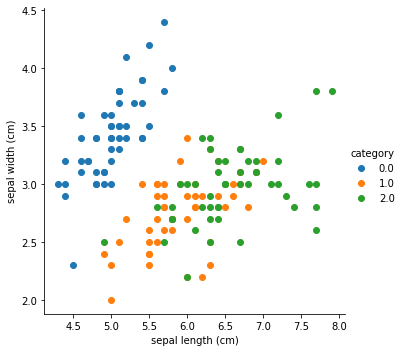

In [77]:
sns.FacetGrid(data=X,hue='category',size=5).map(plt.scatter,"sepal length (cm)","sepal width (cm)").add_legend()

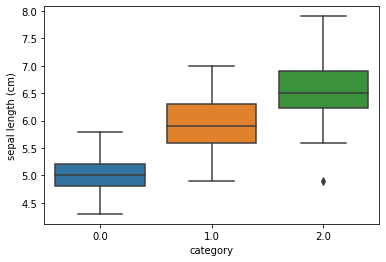

In [79]:
sns.boxplot(x="category",y="sepal length (cm)",data=X)

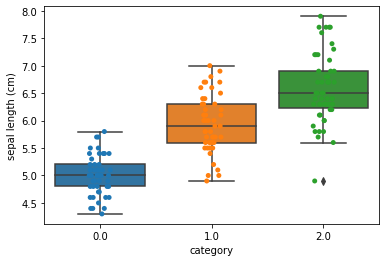

In [87]:
sns.boxplot(x="category",y="sepal length (cm)",data=X)
sns.stripplot(x="category",y="sepal length (cm)",data=X,jitter=True,edgecolor="grey")

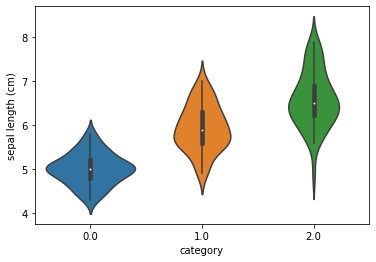

In [88]:
sns.violinplot(x="category",y="sepal length (cm)",data=X)

C:\Users\Shahid\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


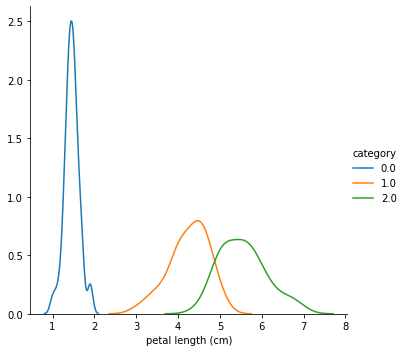

In [90]:
sns.FacetGrid(data=X,hue="category",size=5).map(sns.kdeplot,"petal length (cm)").add_legend()

C:\Users\Shahid\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


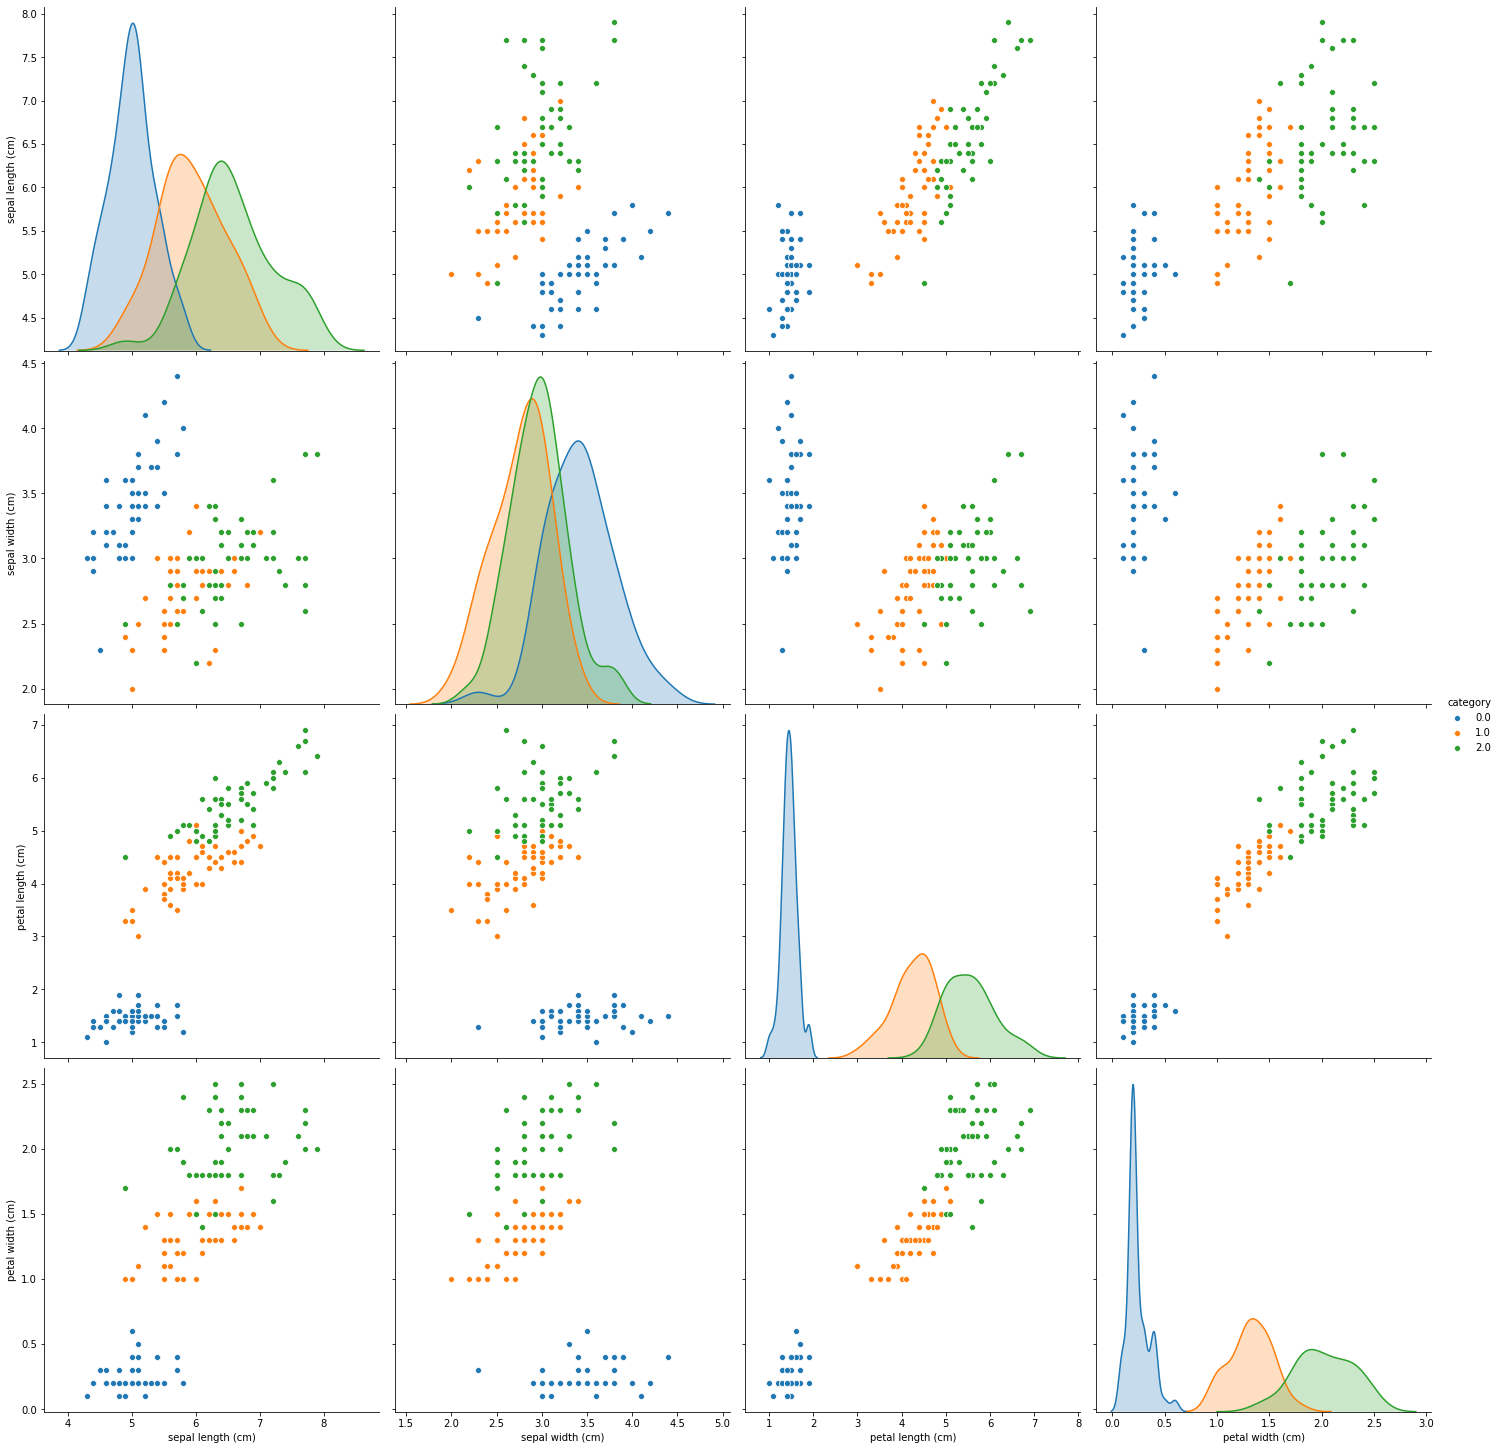

In [91]:
sns.pairplot(X,hue="category",size=5)

C:\Users\Shahid\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


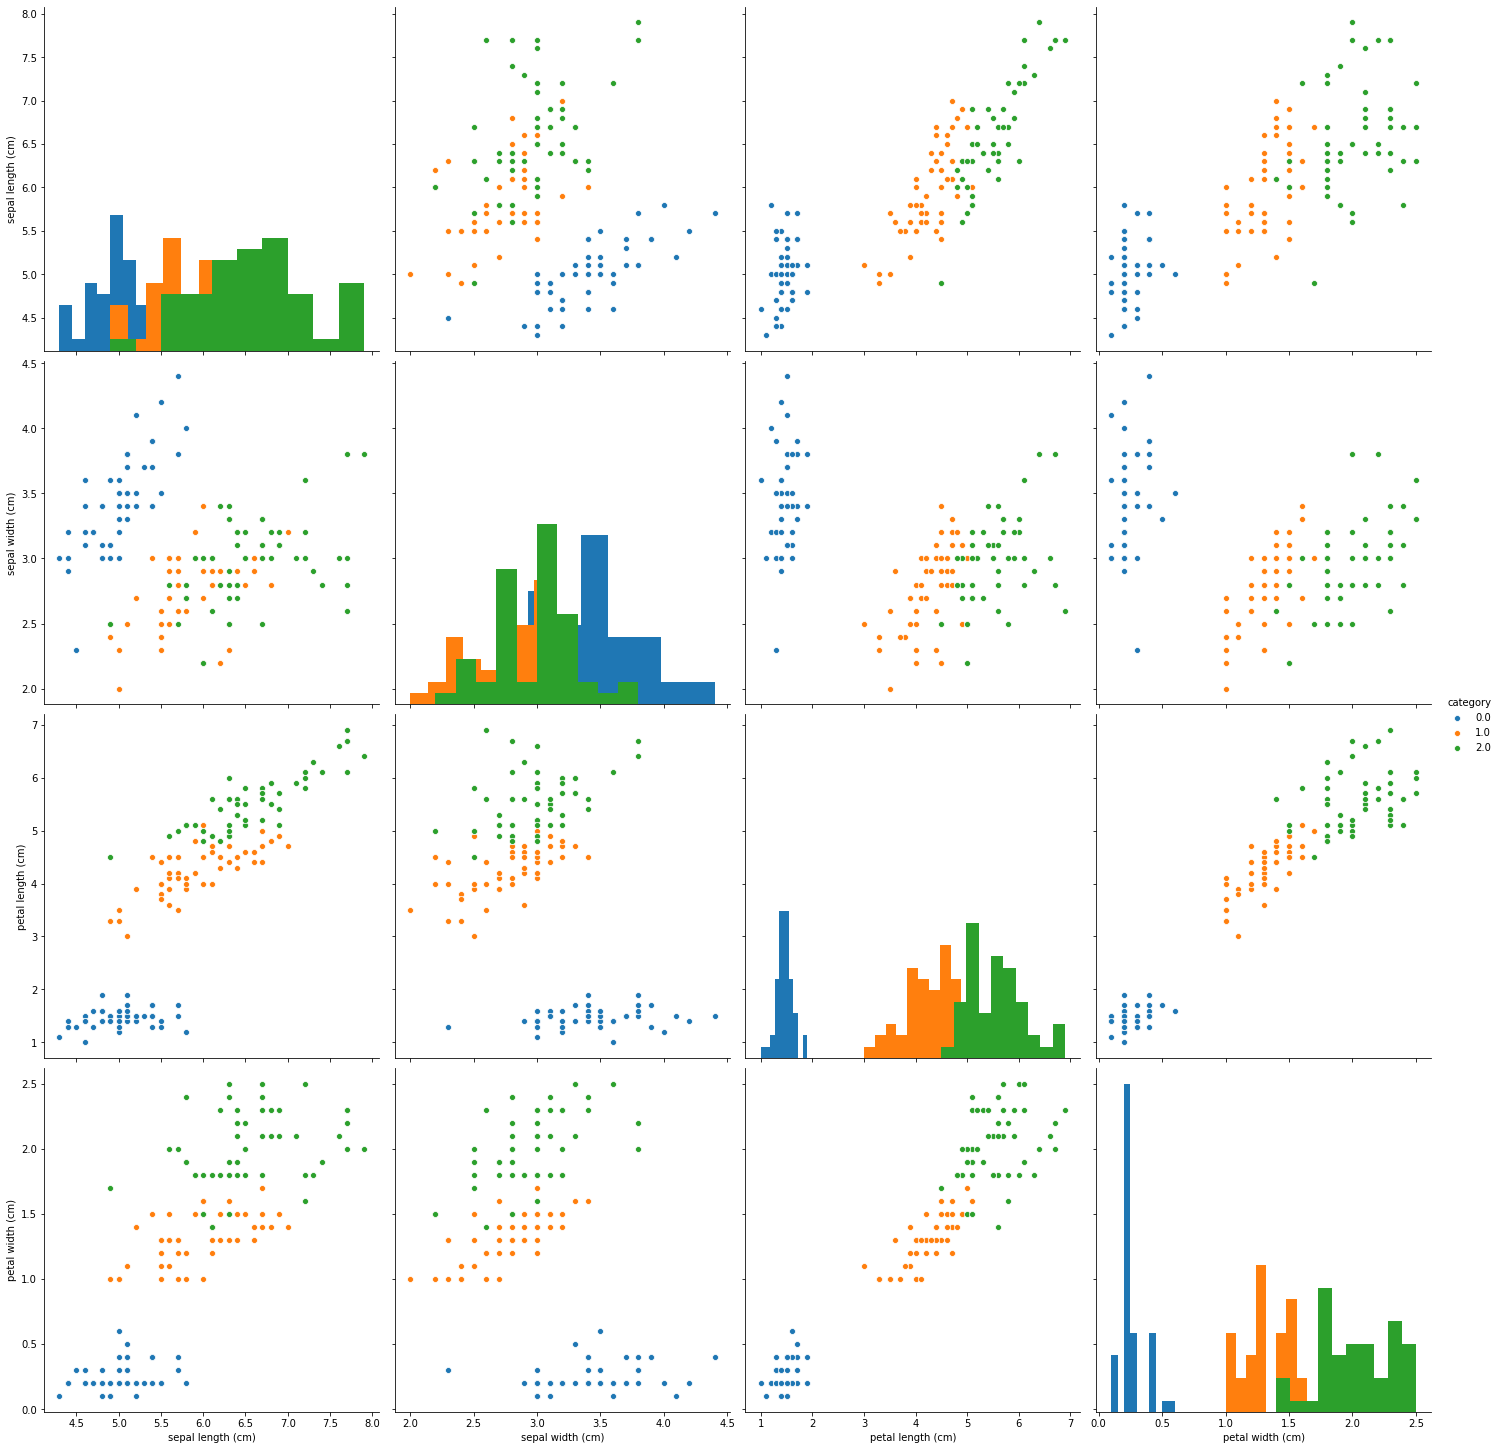

In [94]:
sns.pairplot(X,hue="category",size=5,diag_kind="hist")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000121B50B6B08>,
      dtype=object)

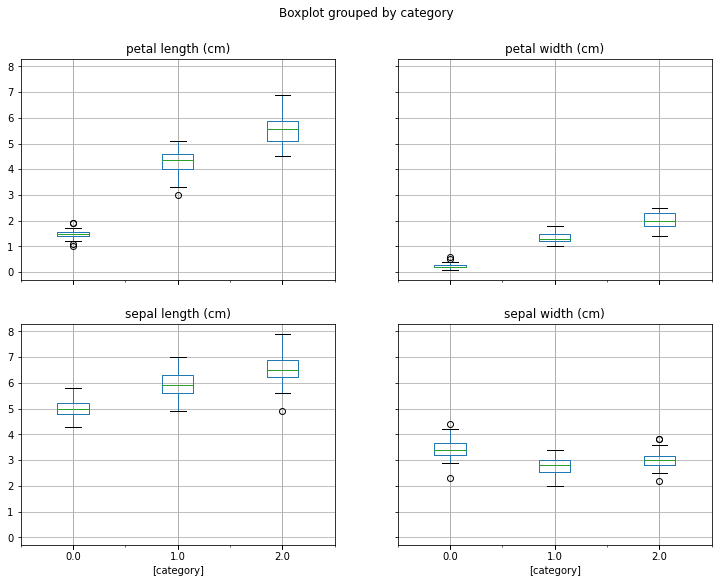

In [95]:
X.boxplot(by="category",figsize=(12,9))

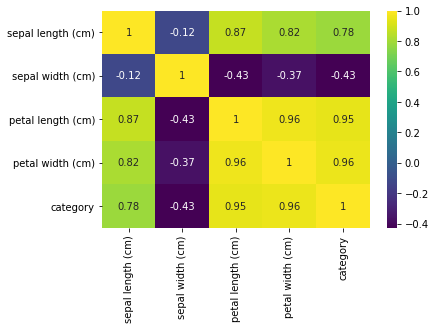

In [105]:
sns.heatmap(X.corr(),annot=True,cmap="viridis")

In [98]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.1,random_state=42)

In [99]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=100)
classifier.fit(xtrain,ytrain)

RandomForestClassifier()

In [103]:
from sklearn.model_selection import cross_validate,cross_val_score
result=cross_val_score(classifier,xtest,ytest,cv=5)
result.mean()

C:\Users\Shahid\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


1.0

In [104]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(classifier.predict(xtest),ytest))

[[6 0 0]
 [0 6 0]
 [0 0 3]]
